In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
import matplotlib.pyplot as plt
from DeepSeqG9 import *
import numpy as np

In [159]:
hgmd = "../dat/hgmd/hgmd.std.csv"
cancer = "../dat/hotspot/cancer_hotspot.std.csv"
clinvar = "../dat/clinvar/clinvar.std.csv"
pr_coding_genes = "/Users/jiayao/Work/Resources/protein-coding_gene.txt"

In [160]:
ins.mergeTable(pr_coding_genes,  hgmd, clinvar, cancer, AF=1e-4)

In [161]:
gnomad = ""
ins.MakeBenighVars(gnomad, "hgmd_clinvar_cancer_combined_pathogenic_variants.tsv")

2667


In [ ]:
df = pd.read_csv(hgmd, sep = "\t")
print df.columns.values

['genename' 'assembly' 'chr' 'pos' 'ref' 'alt' 'ref_aa' 'alt_aa'
 'swissprot_pos' 'ensp' 'swissprot' 'dbsnp' 'source' 'source_id' 'target'
 'descr' 'var_id' 'swissprot_var_id' 'af']


In [ ]:
dat = []
genes = []
for k,v in res.items():
    #print k, len(v)
    genes.append(k)
    dat.append(len(v))
genes.sort()

In [ ]:
mpl.pyplot.hist(dat, bins = 200)
plt.xlim(0,200)
plt.show()
print len([x for x in dat if x >10])
print len([x for x in dat if x >20])

In [ ]:
gnomad_file = "/Users/jiayao/Work/DeepSeq/dat/gnomAD/test.vcf.gz"
#gnomad_file = "/Users/jiayao/Work/DeepSeq/dat/gnomAD/haha.vcf.gz"

In [7]:
head = ['genename', 'assembly', 'chr', 'pos', 'ref', 'alt', 'ref_aa', 'alt_aa', 'swissprot_pos', 'ensp', 'swissprot', 
        'dbsnp', 'source', 'source_id', 'target', 'descr', 'var_id', 'swissprot_var_id', 'af']
print zip(range(19), head)

CSQ_FMT = 'Allele|Consequence|IMPACT|SYMBOL|Gene|Feature_type|Feature|BIOTYPE|EXON|INTRON|HGVSc|HGVSp|cDNA_position|CDS_position|Protein_position|Amino_acids|Codons|Existing_variation|ALLELE_NUM|DISTANCE|STRAND|FLAGS|VARIANT_CLASS|MINIMISED|SYMBOL_SOURCE|HGNC_ID|CANONICAL|TSL|APPRIS|CCDS|ENSP|SWISSPROT|TREMBL|UNIPARC|GENE_PHENO|SIFT|PolyPhen|DOMAINS|HGVS_OFFSET|GMAF|AFR_MAF|AMR_MAF|EAS_MAF|EUR_MAF|SAS_MAF|AA_MAF|EA_MAF|ExAC_MAF|ExAC_Adj_MAF|ExAC_AFR_MAF|ExAC_AMR_MAF|ExAC_EAS_MAF|ExAC_FIN_MAF|ExAC_NFE_MAF|ExAC_OTH_MAF|ExAC_SAS_MAF|CLIN_SIG|SOMATIC|PHENO|PUBMED|MOTIF_NAME|MOTIF_POS|HIGH_INF_POS|MOTIF_SCORE_CHANGE|LoF|LoF_filter|LoF_flags|LoF_info'
CSQ_FMT = CSQ_FMT.split("|")
print CSQ_FMT
def getINFO(info_string):
    infolist = info_string.split(';')
    infodict = {}
    for kv in infolist:
        kv = kv.split('=')
        if len(kv) == 2:
            k, v = kv
            if k in infodict:
                infodict[k].append(v) 
            else:
                infodict[k] = [v]
    return infodict
def searchCANONICAL(CSQLIST):
    for csq in CSQLIST:
        csq = csq.split("|")
        CSQ = dict(zip(CSQ_FMT, csq))
        if CSQ["CANONICAL"] == "YES":
            #return csq
            return "YES"
    return None
def displayCSQ(head, _dict):
    for item in head:
        print "{}:{}\t".format(item, _dict[item]),

[(0, 'genename'), (1, 'assembly'), (2, 'chr'), (3, 'pos'), (4, 'ref'), (5, 'alt'), (6, 'ref_aa'), (7, 'alt_aa'), (8, 'swissprot_pos'), (9, 'ensp'), (10, 'swissprot'), (11, 'dbsnp'), (12, 'source'), (13, 'source_id'), (14, 'target'), (15, 'descr'), (16, 'var_id'), (17, 'swissprot_var_id'), (18, 'af')]
['Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Gene', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON', 'INTRON', 'HGVSc', 'HGVSp', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation', 'ALLELE_NUM', 'DISTANCE', 'STRAND', 'FLAGS', 'VARIANT_CLASS', 'MINIMISED', 'SYMBOL_SOURCE', 'HGNC_ID', 'CANONICAL', 'TSL', 'APPRIS', 'CCDS', 'ENSP', 'SWISSPROT', 'TREMBL', 'UNIPARC', 'GENE_PHENO', 'SIFT', 'PolyPhen', 'DOMAINS', 'HGVS_OFFSET', 'GMAF', 'AFR_MAF', 'AMR_MAF', 'EAS_MAF', 'EUR_MAF', 'SAS_MAF', 'AA_MAF', 'EA_MAF', 'ExAC_MAF', 'ExAC_Adj_MAF', 'ExAC_AFR_MAF', 'ExAC_AMR_MAF', 'ExAC_EAS_MAF', 'ExAC_FIN_MAF', 'ExAC_NFE_MAF', 'ExAC_OTH_MAF', 'ExAC_SAS_MAF', 'CLI

In [ ]:
hand = gzip.open(gnomad_file, 'rb')
outfil = csv.writer(open("benigh.tsv", 'wb'), delimiter="\t")
outfil.writerow(head)
for l in hand:
    if l.startswith("#"):
        continue
    llist = l.strip().split("\t")
    Chr, Pos, ID, ref, alt = llist[0:5]
    if len(ref) != 1:
        continue
    INFO_string = llist[7]
    info_dict = getINFO(INFO_string)
    #print info_dict
    #CSQ = searchCANONICAL(info_dict["CSQ"])
    CSQ = info_dict["CSQ"][0].split("|")
    CSQ = dict(zip(CSQ_FMT, CSQ))
    if CSQ["Consequence"] != "missense_variant":
        continue
    AA = CSQ["Amino_acids"].split("/")
    res = [""]*19
    res[0] = info_dict["Gene.refGene"][0]
    res[1] = 'b37'
    res[2] = Chr
    res[3] = Pos
    res[4] = ref
    res[5] = alt.split(",")[0]
    res[6] = AA[0]
    res[7] = AA[1]
    res[8] = CSQ["Protein_position"]
    res[9] = CSQ["ENSP"]
    res[10] = CSQ["SWISSPROT"]
    res[11] = info_dict["avsnp147"][0]
    res[12] = "gnomAD_exome"
    res[13] = "-"
    res[14] = "-"
    res[15] = "-"
    res[16] = "{}_{}_{}_{}".format(Chr,Pos,ref,res[5])
    res[17] = "{}_{}_{}_{}".format(res[10],res[8],res[6],res[7])
    res[18] = info_dict["gnomAD_exome_ALL"][0]
    outfil.writerow(res)

In [2]:
f1 = "../dat/TrainingData/benigh.tsv"
f2 = "../dat/TrainingData/hgmd_clinvar_cancer_combined_pathogenic_variants.tsv"

In [3]:
reader1 = csv.reader(open(f2, 'rb'), delimiter="\t")
header = reader1.next()
pathvarset = []
for row in reader1:
    pathvarset.append(row[16])
pathvarset = set(pathvarset)

In [8]:
reader2 = csv.reader(open(f1, 'rb'), delimiter="\t")
header = reader2.next()
outfil = csv.writer(open("benigh.clean.tsv", 'wb'), delimiter="\t")
outfil.writerow(head)
for row in reader2:
    varid = row[16]
    if varid in pathvarset:
        continue
    outfil.writerow(row)


# Count

In [11]:
Gene2PDB = {}
for l in open("../dat/data/UniProt_PDB_ID_List.txt", 'rb'):
    if l.startswith("Entry"):
        continue
    llist = l.strip().split()
    if len(llist) < 3: #No PDB file
        continue
    if not llist[2].endswith(";"):
        continue
    Uniprot = llist[0]
    gene = llist[1]
    pdb = llist[2].split(";")[0]
    Gene2PDB[Uniprot] = pdb

IOError: [Errno 2] No such file or directory: '../dat/data/UniProt_PDB_ID_List.txt'

In [20]:
benigh = "./benigh.clean.tsv"
patho = "./hgmd_clinvar_cancer_combined_pathogenic_variants.tsv"

In [24]:
class Gene:
    def __init__(self, gene, uniprot):
        self.uniprot = uniprot
        self.gene = gene
        self.Bmutations = []
        self.Pmutations = []
genedict = {}
P = csv.reader(open(patho, 'rb'), delimiter="\t")
P.next()
for row in P:
    if len(row) != len(header):
        continue
    uniprot, gene, mut = row[10], row[0], row[16]
    if gene not in genedict:
        genedict[gene] = Gene(gene, uniprot)
    genedict[gene].Pmutations.append(mut)
    
B = csv.reader(open(benigh, 'rb'), delimiter="\t")
B.next()
for row in B:
    if len(row) != len(header):
        continue
    uniprot, gene, mut = row[10], row[0], row[16]
    if gene not in genedict:
        genedict[gene] = Gene(gene, uniprot)
    genedict[gene].Bmutations.append(mut)

In [25]:
Bs, Ps = [], []
Selected = []
for K, gene in genedict.items():
    Bs.append(len(gene.Bmutations))
    Ps.append(len(gene.Pmutations))
    if len(gene.Pmutations) > 43 and len(gene.Bmutations) > 43 and gene.uniprot in Gene2PDB:
        Selected.append(gene)
print len(Selected)

0


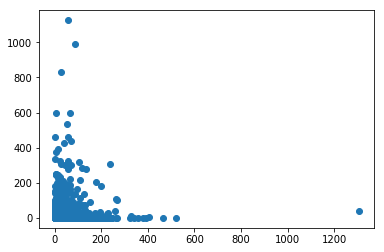

In [26]:
bbs = [float(x)/10 for x in Bs]
pps = [x for x in Ps]
plt.scatter(bbs, pps)
plt.show()

In [ ]:
plt.hist(Bs, bins=1000, color="blue")
plt.hist(Ps, bins=1000, color="red")
plt.xlim(0,200)
plt.show()

In [ ]:
Bs, Ps = [], []
for gene in Selected:
    Bs.append(len(gene.Bmutations))
    Ps.append(len(gene.Pmutations))

In [ ]:
plt.scatter([float(x)/10 for x in Bs], Ps)
plt.show()

In [ ]:
fout = open("selected.genes.txt", 'wb')
geneset = []
for gene in Selected:
    geneset.append(gene.gene) 
    fout.write(gene.gene+"\n")
geneset = set(geneset)
print len(geneset)

In [ ]:
SP = csv.writer(open("Pathogenic.selected.tsv", 'wb'), delimiter="\t")
SB = csv.writer(open("Benigh.selected.tsv", 'wb'), delimiter="\t")


P = csv.reader(open(patho, 'rb'), delimiter="\t")
SP.writerow(P.next())
for row in P:
    gene, mut = row[0], row[16]
    if gene in geneset:
        SP.writerow(row)
    
B = csv.reader(open(benigh, 'rb'), delimiter="\t")
SB.writerow(B.next())
for row in B:
    gene, mut = row[0], row[16]
    if gene in geneset:
        SB.writerow(row)

In [ ]:
def AnnotatePDBFname(inpF, outF):
    Fin = csv.reader(open(inpF, 'rb'), delimiter="\t")
    Fout = csv.writer(open(outF, 'wb'), delimiter="\t")
    Fout.writerow(["PDB.Fil"] + Fin.next())
    for row in Fin:
        uniprot, gene, mut = row[10], row[0], row[16]
        if uniprot not in Gene2PDB:
            PDB = "-"
        else:
            PDB = Gene2PDB[uniprot]
        Fout.writerow([PDB]+row)

In [ ]:
AnnotatePDBFname("Pathogenic.selected.tsv", "Pathogenic.selected.PDB.tsv")

In [ ]:
AnnotatePDBFname("Benigh.selected.tsv", "Benigh.selected.PDB.tsv")

# Select PDB file

In [ ]:
MapFilHead = ["PDB", "Chain", "PDB sequential residue number", "PDB_AA", "PDB_Coord", "Uniprot", "Uni_AA", "Uni_Coord"]
PDB2Uniprot = "../dat/test.map"
ins.ProcessPDB2Uniprot(PDB2Uniprot)

In [ ]:
Uni2PDBFil = "Uni2PDB.res.map"
ResMapFil = "../dat/PDB2SWISS.sort.tsv"
reader = csv.reader(open(Uni2PDBFil, 'rb'), delimiter="\t")
keeps = []
for row in reader:
    Uni = row[0]
    pdb, chain = row[1].split(".")
    ID = ".".join([Uni,pdb,chain])
    keeps.append(ID)
keeps = set(keeps)
reader = csv.reader(open(ResMapFil, 'rb'), delimiter="\t")
writer = csv.writer(open("../dat/PDB2SWISS.select.tsv", 'wb'), delimiter="\t")
for row in reader:
    ID = ".".join([row[5], row[0], row[1]])
    if ID in keeps:
        writer.writerow(row)


# Clean up Transcripts and Exons

In [ ]:
MPCTrans = pd.read_excel("../dat/MPC.Transcripts.xlsx", sheetname="Table_S2")
ExACTrans = pd.read_excel("../dat/ExAC_Genes_constrain.xlsx", sheetname="Gene Constraint")

In [ ]:
transcriptSet = set(ExACTrans["transcript"].values)

In [ ]:
transcript = ExACTrans["transcript"].values
gene = ExACTrans["gene"].values
_map = dict(zip(transcript, gene))

In [ ]:
reader = csv.reader(open("../dat/hgTables.txt", 'rb'), delimiter="\t")
writer = csv.writer(open("../dat/gencodeV19.selected.Transcripts.bed", 'wb'), delimiter="\t")
for row in reader:
    trans = row[3].split("_")[0]
    if trans in transcriptSet:
        row.append(_map[trans])
        writer.writerow(row)

# Regression Model on Pmut and Emut

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy
from scipy import stats

In [77]:
ExAC = pd.read_excel("../dat/ExAC_Genes_constrain.xlsx", sheetname="Gene Constraint")

In [78]:
ExAC = ExAC[~ExAC["chr"].isin(["X","Y"])]

In [79]:
N = 1e7
mu_syn = ExAC["mu_syn"].values
n_syn = ExAC["n_syn"].values
e_syn = ExAC["exp_syn"].values
X = [x*N for x in mu_syn]
Y = n_syn

In [80]:
slope, intercept, r_value, p_value, std_err = stats.linregress(n_syn,e_syn)
print "slope:{}, intercept:{}, R2:{}, P:{}".format(slope, intercept, r_value**2,p_value)

slope:0.94609829828, intercept:5.91090977029, R2:0.955839110698, P:0.0


In [81]:
def LinearModelPredict(slope, intercept, X):
    return slope*X+intercept

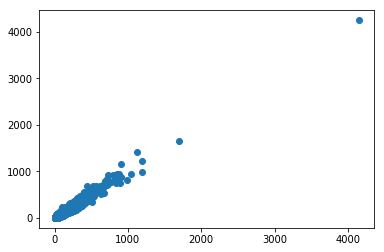

In [82]:
plt.scatter(e_syn, n_syn)
plt.show()

In [109]:
N = 1e7
mu_mis = ExAC["mu_mis"].values
n_mis = ExAC["n_mis"].values
exp_mis = ExAC["exp_mis"].values
exp_mis_J = [LinearModelPredict(1.00873430543, 1.49957822023, x*N) for x in mu_mis]
X = [x*N for x in mu_mis]
Y = n_mis

slope:0.94450742332, intercept:-5.12782335911, R2:0.837257713578, P:0.0


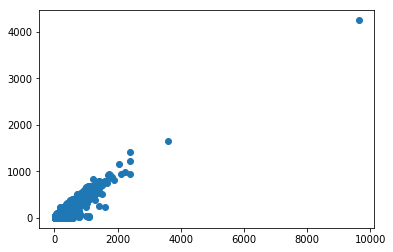

In [105]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
print "slope:{}, intercept:{}, R2:{}, P:{}".format(slope, intercept, r_value**2,p_value)
plt.scatter(X, n_syn)
plt.show()

In [112]:
print len(exp_mis), exp_mis[0:10]
print len(exp_mis_J), exp_mis_J[0:10]

17484 [ 837.31460102  311.83321552  149.1277385    50.87644239   82.9624756
  297.29009792  231.45624835  243.26647544   69.31116853  110.74877095]
17484 [1032.4936809146991, 293.86541542440034, 248.38384080875224, 100.7080387684442, 74.615255005820671, 337.30751769897608, 266.09529443067538, 315.75389824268296, 81.954079483786188, 166.4368465441429]


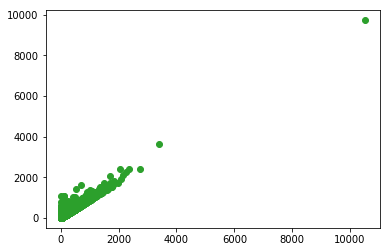

In [113]:
plt.scatter(exp_mis, exp_mis_J)
plt.show()

In [95]:
SUB = ExAC[~ExAC["chr"].isin(["X","Y"])]

In [96]:
mu_syn = SUB["mu_syn"].values
mu_mis = SUB["mu_mis"].values
exp_syn = SUB["exp_syn"].values
exp_mis = SUB["exp_mis"].values
n_syn = SUB["n_syn"].values
n_mis = SUB["n_mis"].values

In [97]:
X = [(x/y) for (x,y) in zip(mu_syn, mu_mis)]
Y = [(x/y) for (x,y) in zip(exp_syn, exp_mis)]

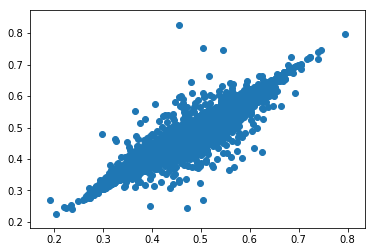

In [98]:
plt.scatter(X, Y)
plt.show()

In [22]:
def chi2(obs, exp):
    return (obs-exp)**2/exp

In [29]:
def Zscore(obs, exp):
    chi2 = (obs-exp)**2/exp
    if obs > exp:
        return -1 * math.sqrt(chi2)
    else:
        return math.sqrt(chi2)

In [25]:
obs, exp = 227.0 ,154.668965626
X = chi2(obs, exp)
Z = math.sqrt(X)
print X,Z

33.825651529 5.81598242165


In [26]:
0.01/17000

5.882352941176471e-07

In [36]:
ExACTrans = pd.read_excel("../dat/ExAC_Genes_constrain.xlsx", sheetname="Gene Constraint")

In [37]:
ExACTrans.head(5)

,transcript,gene,chr,n_exons,cds_start,cds_end,bp,mu_syn,mu_mis,mu_lof,...,n_lof,exp_syn,exp_mis,exp_lof,syn_z,mis_z,lof_z,pLI,pRec,pNull
0,ENST00000379370.2,AGRN,1,36,955552,990361,6138,0.000055,0.000102,4.848279e-06,...,13,445.215539,837.314601,54.416958,-2.109089,0.140544,5.561613,1.733523e-01,0.826648,1.592093e-09
1,ENST00000327044.6,NOC2L,1,19,880073,894620,2250,0.000014,0.000029,2.065329e-06,...,29,154.668966,311.833216,28.883512,-3.605556,-2.275892,-0.021471,1.330382e-19,0.002563,9.974372e-01
2,ENST00000379198.2,B3GALT6,1,1,1167658,1168648,990,0.000014,0.000024,4.561960e-07,...,2,82.403301,149.127739,3.000516,2.349510,3.209371,0.572158,4.810447e-02,0.682102,2.697937e-01
3,ENST00000421241.2,C1orf159,1,8,1018272,1026923,597,0.000005,0.000010,5.878979e-07,...,2,25.770931,50.876442,4.392331,-0.882809,-0.419916,1.130742,9.087764e-02,0.765691,1.434310e-01
4,ENST00000379389.4,ISG15,1,2,948953,949858,498,0.000004,0.000007,2.358722e-07,...,3,47.592276,82.962476,3.510674,0.322813,0.212786,0.269984,9.847813e-03,0.600249,3.899029e-01


In [30]:
n_syn = ExACTrans["n_syn"].values
exp_syn = ExACTrans["exp_syn"].values
ucz = [Zscore(obs,exp) for obs, exp in zip(n_syn,exp_syn)]

In [39]:
print np.sum(ExACTrans["n_mis"])

3103060


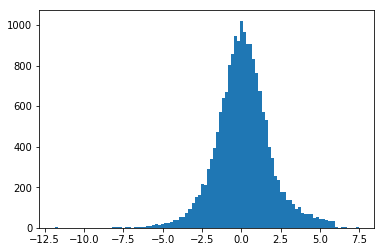

In [32]:
plt.hist(ucz, 100)
plt.show()

In [36]:
subz = [x for x in ucz if abs(x)<5]
std = np.std(subz)
print std

1.61301505964


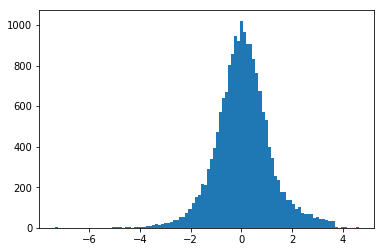

In [37]:
cz = [x/std for x in ucz]
plt.hist(cz, 100)
plt.show()

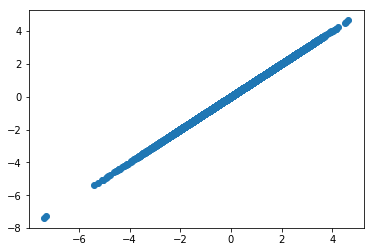

In [38]:
syn_z = ExACTrans["syn_z"].values
plt.scatter(syn_z, cz)
plt.show()

In [39]:
n_mis = ExACTrans["n_mis"].values
exp_mis = ExACTrans["exp_mis"].values
ucz = [Zscore(obs,exp) for obs, exp in zip(n_mis,exp_mis)]

In [55]:
halfZ = [x for x in ucz if x < 0]
tmp = halfZ[:]
halfZ.extend([x*-1 for x in tmp])
std = np.std(halfZ)
ref = [x/std for x in halfZ]
print std

2.67699700414


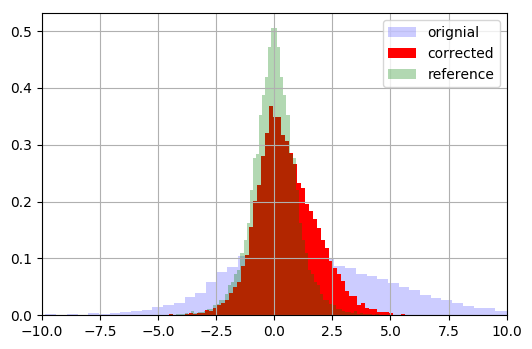

In [66]:
cz = [x/std for x in ucz]
fig, ax = plt.subplots(dpi=100)
plt.hist(ucz, 100, color="blue", alpha=0.2, normed=1, label = "orignial")
plt.hist(cz, 100, color="red", normed=1, label = "corrected")
plt.hist(ref, 100, color="green", alpha = 0.3, normed=1, label = "reference")
plt.xlim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

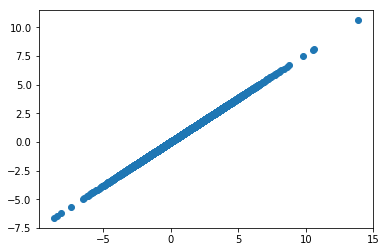

In [44]:
mis_z = ExACTrans["mis_z"].values
plt.scatter(mis_z, cz)
plt.show()

In [50]:
125748.0 * 2 / 1000

251.496

In [49]:
60000 * 2 /1000

120

In [28]:
ExonTab = pd.read_csv("/Users/jiayao/Work/DeepSeq/DeepseqG9/Jiayao/src/ExonMuteRate.tsv", delimiter="\t", header=None)
ExonTab.columns = ["chr", "start", "end", "Trans", "0", "srand", "gene", "DoC", "syn_obs", "mis_obs", "mis_mu"]

In [29]:
ExonTab.head(5)

,chr,start,end,Trans,0,srand,gene,DoC,syn_obs,mis_obs,mis_mu
0,chr1,67000041,67000051,ENST00000371037.4_cds_0_0_chr1_67000042_f,0,+,SGIP1,65.000000,0,0,1.037008e-07
1,chr1,67091529,67091593,ENST00000371037.4_cds_1_0_chr1_67091530_f,0,+,SGIP1,54.000000,6,7,1.004450e-06
2,chr1,67098752,67098777,ENST00000371037.4_cds_2_0_chr1_67098753_f,0,+,SGIP1,72.000000,1,2,1.727506e-07
3,chr1,67101626,67101698,ENST00000371037.4_cds_3_0_chr1_67101627_f,0,+,SGIP1,64.597222,0,0,9.691778e-07
4,chr1,67105459,67105516,ENST00000371037.4_cds_4_0_chr1_67105460_f,0,+,SGIP1,59.000000,4,11,4.808742e-07


In [30]:
"slope:0.94609829828, intercept:5.91090977029"
slope = 0.94609829828 
intercept = 5.91090977029

In [31]:
def CorrectCount(ExpC, Cov):
    if Cov >= 50:
        return ExpC
    elif Cov >1:
        return ExpC * (0.089 + 0.217 * math.log(Cov))
    else:
        return 0.089 * ExpC

In [32]:
ExonTab["mis_exp"] = ExonTab["mis_mu"]*slope*1e7+intercept

In [33]:
ExonTab.head(5)

,chr,start,end,Trans,0,srand,gene,DoC,syn_obs,mis_obs,mis_mu,mis_exp
0,chr1,67000041,67000051,ENST00000371037.4_cds_0_0_chr1_67000042_f,0,+,SGIP1,65.000000,0,0,1.037008e-07,6.892021
1,chr1,67091529,67091593,ENST00000371037.4_cds_1_0_chr1_67091530_f,0,+,SGIP1,54.000000,6,7,1.004450e-06,15.413992
2,chr1,67098752,67098777,ENST00000371037.4_cds_2_0_chr1_67098753_f,0,+,SGIP1,72.000000,1,2,1.727506e-07,7.545300
3,chr1,67101626,67101698,ENST00000371037.4_cds_3_0_chr1_67101627_f,0,+,SGIP1,64.597222,0,0,9.691778e-07,15.080285
4,chr1,67105459,67105516,ENST00000371037.4_cds_4_0_chr1_67105460_f,0,+,SGIP1,59.000000,4,11,4.808742e-07,10.460452


In [34]:
mis_exp = ExonTab["mis_exp"].values
mis_obs = ExonTab["mis_obs"].values

In [35]:
print np.sum(mis_obs)

3795535


In [41]:
3795535.0/3103060

1.223158752972872

184220


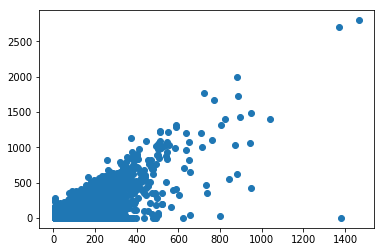

In [91]:
plt.scatter(mis_exp, mis_obs)
print len(mis_exp)
plt.show()

1.89012288147


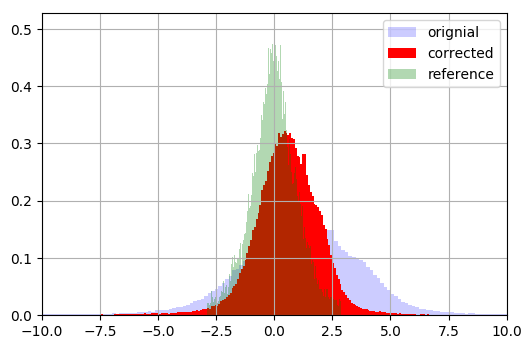

In [139]:
ucz = [Zscore(obs,exp) for obs, exp in zip(mis_obs,mis_exp)]
halfZ = [x for x in ucz if (x < 0 and x>-5.44)]
tmp = halfZ[:]
halfZ.extend([x*-1 for x in tmp])
std = np.std(halfZ)
ref = [x/std for x in halfZ]
print std
cz = [x/std for x in ucz]
fig, ax = plt.subplots(dpi=100)
plt.hist(ucz, 1000, color="blue", alpha=0.2, normed=1, label = "orignial")
plt.hist(cz, 1000, color="red", normed=1, label = "corrected")
plt.hist(ref, 1000, color="green", alpha = 0.3, normed=1, label = "reference")
plt.xlim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

In [130]:
0.01/184220

5.4282922592552386e-08

In [131]:
0.01 / 18466

5.415357955160836e-07

In [132]:
scipy.stats.norm(0, 1).cdf(5.4282922592552386e-08)

0.50000002165575297

In [136]:
p_values = scipy.stats.norm.sf(5.44) * 2
print p_values

5.32805712199e-08


In [134]:
1 - 0.158655253931

0.841344746069

In [140]:
ExonTab["mis_z"] = cz

In [141]:
ExonTab.head(5)

,chr,start,end,Trans,0,srand,gene,DoC,syn_obs,mis_obs,mis_mu,mis_exp,mis_z
0,chr1,67000041,67000051,ENST00000371037.4_cds_0_0_chr1_67000042_f,0,+,SGIP1,65.000000,0,0,1.037008e-07,6.892021,1.388939
1,chr1,67091529,67091593,ENST00000371037.4_cds_1_0_chr1_67091530_f,0,+,SGIP1,54.000000,6,7,1.004450e-06,15.413992,1.133847
2,chr1,67098752,67098777,ENST00000371037.4_cds_2_0_chr1_67098753_f,0,+,SGIP1,72.000000,1,2,1.727506e-07,7.545300,1.068063
3,chr1,67101626,67101698,ENST00000371037.4_cds_3_0_chr1_67101627_f,0,+,SGIP1,64.597222,0,0,9.691778e-07,15.080285,2.054541
4,chr1,67105459,67105516,ENST00000371037.4_cds_4_0_chr1_67105460_f,0,+,SGIP1,59.000000,4,11,4.808742e-07,10.460452,-0.088260


In [142]:
ExonTab.to_csv("ExonTablewithMisZ.csv", index="False")

In [146]:
path = pd.read_csv("pathogenic.misz.tsv", delimiter="\t")
ben = pd.read_csv("benign.misz.tsv", delimiter="\t")
path.head()

/Users/jiayao/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,18,19,21,22,27,28,41,42,44,45,50,51,54,55,56,57,58,59,60,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jiayao/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6,7,8,9,10,11,12,13,14,15,16,18,19,21,22,27,28,30,31,33,34,36,37,39,40,41,42,44,45,50,51,54,55,56,57,58,59,60,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MisZ,Chr,Start,End,Ref,Alt,gnomAD_exome_ALL,gnomAD_exome_AFR,gnomAD_exome_AMR,gnomAD_exome_ASJ,...,phyloP20way_mammalian_rankscore,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons20way_mammalian,phastCons20way_mammalian_rankscore,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,Interpro_domain,GTEx_V6p_gene,GTEx_V6p_tissue
0,-0.310697,1,1289293,1289293,A,T,.,.,.,.,...,0.866,1.000,0.715,0.997,0.653,12.135,0.531,.,.,.
1,2.135774,1,1464679,1464679,C,T,.,.,.,.,...,0.046,0.501,0.267,0.087,0.184,12.066,0.527,AAA+ ATPase domain|ATPase\x2c AAA-type\x2c cor...,.,.
2,2.260545,1,1735900,1735900,C,T,.,.,.,.,...,0.490,1.000,0.715,0.985,0.512,18.444,0.906,WD40-repeat-containing domain;WD40-repeat-cont...,.,.
3,2.260545,1,1735935,1735935,T,C,.,.,.,.,...,0.766,1.000,0.715,1.000,0.888,14.571,0.677,G-protein\x2c beta subunit|WD40-repeat-contain...,.,.
4,2.260545,1,1735987,1735987,T,C,.,.,.,.,...,0.766,1.000,0.715,1.000,0.888,14.812,0.695,G-protein\x2c beta subunit|WD40-repeat-contain...,.,.


In [147]:
miszP = path["MisZ"].values
miszB = ben["MisZ"].values

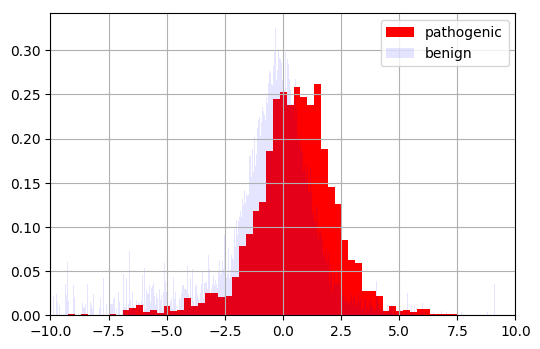

In [155]:
fig, ax = plt.subplots(dpi=100)
plt.hist(miszP, 100, color="red", normed=1, label="pathogenic")
plt.hist(miszB, 1000, color="blue", normed=1, alpha=0.1, label="benign")
plt.xlim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

In [156]:
2508 * 0.94

2357.52

In [157]:
1911 * 0.82

1567.02